In [6]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import netCDF4 as nc
import datetime as dt
import cmocean
import string
import glob
import pickle
import matplotlib as mpl
from salishsea_tools import evaltools as et
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
from scipy.ndimage import gaussian_filter
from matplotlib.ticker import FormatStrFormatter
from NorthNut import vvl_interp_T_to_V, vvl_interp_T_to_U;

%matplotlib inline

calculations have been moved to calcTranspsEstuarineExchange.py

In [7]:
fformat0='%Y%m%d'
mod_start=dt.datetime(2015,1,1)
mod_end=dt.datetime(2015,12,31)
savepath='../../save/transpLines'+mod_start.strftime(fformat0)+'-'+mod_end.strftime(fformat0)+'.pkl'

In [8]:
data=pickle.load(open(savepath,'rb'))
mod_start=data['mod_start']
mod_end=data['mod_end']
volT=data['volT']
no3T=data['no3T']
no3=data['no3']
masks=data['masks']
gdept_1d=data['gdept_1d']
e3t_1d=data['e3t_1d']
ulines=data['ulines']
vlines=data['vlines']

In [20]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    umask=np.copy(fm.variables['umask'])
    vmask=np.copy(fm.variables['vmask'])
    tmask=np.copy(fm.variables['tmask'])
    navlon=np.copy(fm.variables['nav_lon'])
    navlat=np.copy(fm.variables['nav_lat'])

In [14]:
ulines

{'SJDFK': {'i': 140, 'j': (253, 308)},
 'SJDFW': {'i': 20, 'j': (360, 438)},
 'SJDFE': {'i': 186, 'j': (228, 315)},
 'Malaspina': {'i': 187, 'j': (722, 746)}}

In [15]:
vlines

{'Haro': {'i': (213, 246), 'j': 305},
 'SJC': {'i': (258, 270), 'j': 281},
 'Rosario': {'i': (280, 311), 'j': 265},
 'Discovery': {'i': (120, 131), 'j': 737},
 'Sutil': {'i': (138, 164), 'j': 749}}

In [64]:
# t grid point jt, it is bounded by u/v point jt-1 below and jt above
# so next t point greater is u/v grid + 1, and domain ends at u/v 
tmaskSOG=np.copy(tmask)
tmaskSOG[:,:,:500,:180]=0 # SJC
tmaskSOG[:,:,:(vlines['Rosario']['j']+1),:(vlines['Rosario']['i'][1])]=0 #west to rosario
tmaskSOG[:,:,:(vlines['Haro']['j']+1),:vlines['SJC']['i'][0]]=0 # west to haro
tmaskSOG[:,:,300:320,180:200]=0
tmaskSOG[:,:,:(vlines['SJC']['j']+1),:275]=0
tmaskSOG[:,:,:250,:325]=0
tmaskSOG[:,:,:230,:]=0
tmaskSOG[:,:,(vlines['Sutil']['j']+1):,:]=0
tmaskSOG[:,:,ulines['Malaspina']['j'][0]:,(ulines['Malaspina']['i']+1):]=0
tmaskSOG[:,:,710:,190:]=0
tmaskSOG[:,:,730:,170:180]=0
tmaskSOG[:,:,(vlines['Discovery']['j']+1):,110:135]=0

(200, 760)

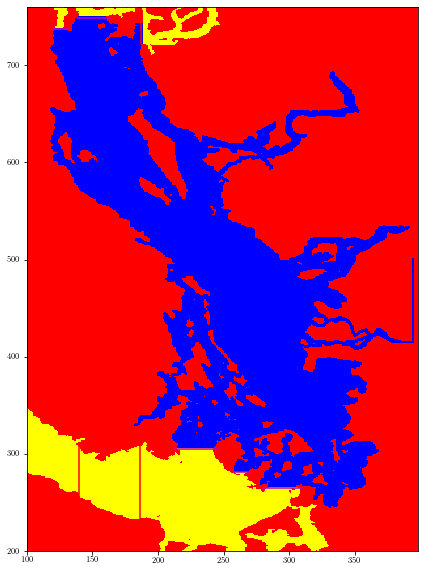

In [69]:
cm1=plt.get_cmap('autumn')
cm2=plt.get_cmap('winter')
fig,ax=plt.subplots(1,1,figsize=(7,10))
ax.pcolormesh(tmask[0,0,:,:],cmap=cm1)
ax.pcolormesh(np.ma.masked_where(tmaskSOG[0,0,:,:]==0,tmaskSOG[0,0,:,:]),cmap=cm2)
for el in ulines.keys():
    ax.plot((ulines[el]['i'],ulines[el]['i']),(ulines[el]['j'][0],ulines[el]['j'][1]),'r-')
for el in vlines.keys():
    ax.plot((vlines[el]['i'][0],vlines[el]['i'][1]),(vlines[el]['j'],vlines[el]['j']),'m-')
ax.set_xlim(100,398)
ax.set_ylim(200,760)

(240, 755)

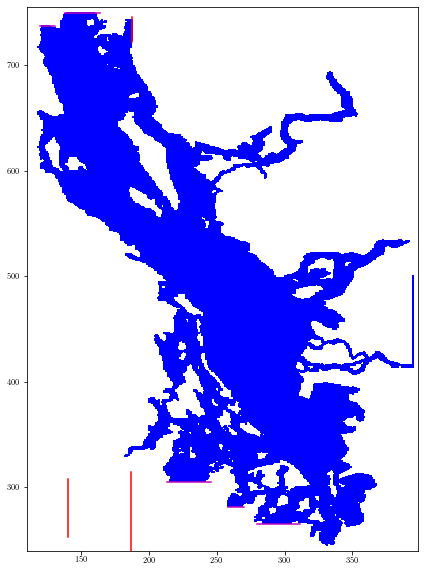

In [76]:
cm1=plt.get_cmap('autumn')
cm2=plt.get_cmap('winter')
fig,ax=plt.subplots(1,1,figsize=(7,10))
ax.pcolormesh(np.ma.masked_where(tmaskSOG[0,0,:,:]==0,tmaskSOG[0,0,:,:]),cmap=cm2)
for el in ulines.keys():
    ax.plot((ulines[el]['i']+.5,ulines[el]['i']+.5),(ulines[el]['j'][0],ulines[el]['j'][1]),'r-')
for el in vlines.keys():
    ax.plot((vlines[el]['i'][0],vlines[el]['i'][1]),(vlines[el]['j']+.5,vlines[el]['j']+.5),'m-')
ax.set_xlim(110,398)
ax.set_ylim(240,755)

In [79]:
ig0=110
ig1=398
jg0=240
jg1=755

In [80]:
SOGtmaskPath='../../save/SOGtmask.pkl'
pickle.dump((tmaskSOG,ig0,ig1,jg0,jg1),open(SOGtmaskPath,'wb'))